# 회귀분석
* 가장 기본적이고, 중요한 통계적 모형
* 모형 = (함수 또는 방정식) + (확률분포)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 선형모형
* 여기서 우리의 포커스는 선형모형을 회귀분석하는 것에 있음.  
* 선형 = 우리의 관심인 변수(여기서는 $\beta_i$)가 덧셈과 상수배로 이뤄져 있다는 뜻  
* 모든 고전적 통계모형의 기본이라고 할 수 있음.  
* 변수의 갯수에 따라 단순선형모형과 다중선형모형으로 나눌 수 있음.  

## 무엇을 할 수 있는가?
    - x가 주어질 때, Y의 평균을 파악해 미래를 예측 (추정의 영역)
    - Y와 x의 관계를 파악. (가설검정의 영역)

물론, 다양한 머신러닝 기법의 등장으로 선형모형만으로 추정을 하는 것은 어리석은 일.  
그러나 그럼에도 불구하고 여전히...

## 왜 선형모형인가?
    - 해석이 쉬움 = 검정이 가능함
    - 추정 과정에 너무 많은 힘을 기울이지 않아도 됨.

# 단순회귀
다음과 같은 선형모형을 단순회귀모형이라고 함.

$$
Y = \beta_0 + \beta_1x + \epsilon \\[5pt]
\epsilon \sim N(0, \sigma)
$$

* $Y$ : 종속변수. 기본적인 선형모형에서는 항상 연속형 데이터.
* $x$ : 독립변수. 연속형 데이터와 이산형 데이터 모두가 될 수 있음.
* $\epsilon$ : 오차항. 확률변수.

## 단순회귀의 가정
> 단순회귀모형은 가정을 가지고 있음.
1. 등분산성 : 모든 분산은 같음.
2. 정규성 : 오차항은 무조건 정규분포, 평균이 0, 분산은 $\sigma^2$를 따름.
3. 선형성 : y와 x는 선형이어야 함.
4. 독립성 : 각 x들은 서로 독립.

단순회귀모형이라면 기본적으로 이 가정들을 무조건 만족해야 함.

## 단순회귀의 추정
$$
Y = \beta_0 + \beta_1x + \epsilon \\[5pt]
\epsilon \sim N(0, \sigma)
$$

무엇을 추정하는가? $\beta_0$와 $\beta_1$, 그리고 $\sigma^2$  
어떻게 추정하나요? 빈도주의를 따른다는 가정하에, 여러가지 방법이 있음.  
1. OLS (ordinary least square)
2. mle (maximum likelihood estimation)
3. mme (method of moments)

우리의 단순회귀가 4가지 가정을 만족한다고 했을 때, OLS를 쓸 수 있음.

## OLS의 원리
* 우리는 
* 이를 함수로 표현한 것을 SSE(Sum of Squared Error)라고 함

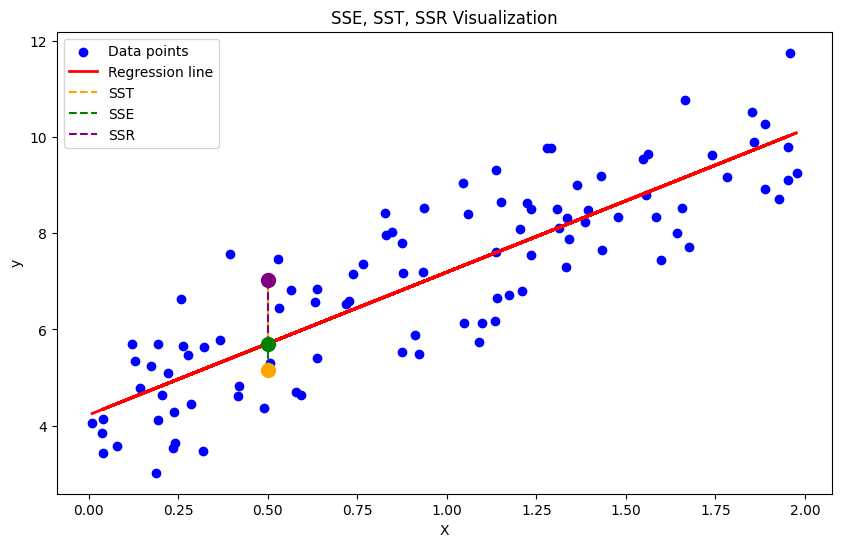

In [4]:
# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# OLS 회귀 모델 적합
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# SSE, SST, SSR 계산
SSE = np.sum((y - y_pred) ** 2)
SST = np.sum((y - np.mean(y)) ** 2)
SSR = SST - SSE

# 예제 데이터 포인트 선택
X_example = np.array([[0.5]])
y_example = 4 + 3 * X_example + np.random.randn(1, 1)
y_pred_example = model.predict(X_example)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 데이터와 회귀선
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression line")

# SST 시각화 (실제 값과 평균 값 사이의 거리)
plt.vlines(X_example, y_example, np.mean(y), color="orange", linestyle="--", label="SST")

# SSE 시각화 (실제 값과 예측 값 사이의 거리)
plt.vlines(X_example, y_example, y_pred_example, color="green", linestyle="--", label="SSE")

# SSR 시각화 (예측 값과 평균 값 사이의 거리)
plt.vlines(X_example, y_pred_example, np.mean(y), color="purple", linestyle="--", label="SSR")

# 레이블 추가
plt.scatter(X_example, y_example, color="orange", s=100, zorder=5)
plt.scatter(X_example, y_pred_example, color="green", s=100, zorder=5)
plt.scatter(X_example, [np.mean(y)], color="purple", s=100, zorder=5)

plt.title("SSE, SST, SSR Visualization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

사진 속 초록색 점들을 

## 단순회귀의 검정
통계적 검정은 언제나 같은 과정을 거친다.
1. 가설의 설정
2. 유의수준 $\alpha$의 설정
3. 검정통계량의 설정
4. 검정하기
    1. p-value < $\alpha$ 면 기각.
    2. 검정통계량 T > 임계값(critical value) 면 기각

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코드 예시